In [6]:
import cv2
import numpy as np
from sklearn import svm
from sklearn.metrics import accuracy_score
import random
import matplotlib.pyplot as plt

# Load your dataset
data_folder = "/kaggle/input/final-data-devnagari/COMPOUND_CHARACTERS"
num_images = 955

# Define a common size for resizing
resize_width, resize_height = 50, 50  # Adjust as needed

# Load images and labels
images = []
labels = []

In [7]:
for i in range(1, num_images + 1):
    image_path = f"{data_folder}/B ({i}).jpg"  # Adjust the file format if needed
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if img is None:
        print(f"Warning: Could not read image {image_path}")
        continue

    # Resize the image to a common size
    img = cv2.resize(img, (resize_width, resize_height))

    # Flatten the image and explicitly set the desired shape
    flattened_img = img.flatten()

    images.append(flattened_img)
    labels.append(i)  # Use the image number as a label

# Convert lists to numpy arrays
X = np.array(images)
y = np.array(labels)


In [21]:
# Create an SVM model
model = svm.SVC(kernel='linear')

# Train the model on the entire dataset
model.fit(X, y)

# Test on 50 random images
random.seed(42)  # Set a seed for reproducibility
test_indices = random.sample(range(1, num_images + 1), 500)

test_images = []
test_labels = []


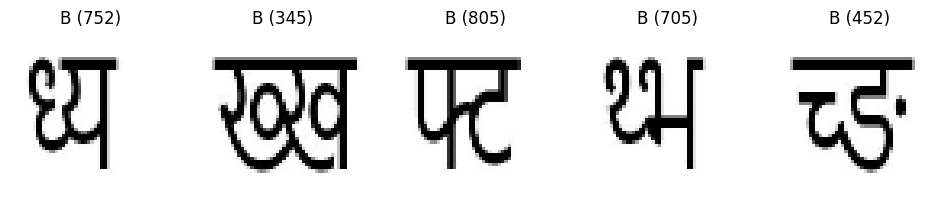

In [22]:
sample_indices = random.sample(range(310, 820), 5)

plt.figure(figsize=(12, 6))
for i, idx in enumerate(sample_indices, 1):
    plt.subplot(1, 5, i)
    image_path = f"{data_folder}/B ({idx}).jpg"
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img_resized = cv2.resize(img, (resize_width, resize_height))
    plt.imshow(img_resized, cmap='gray')
    plt.title(f'B ({idx})')
    plt.axis('off')

plt.show()

In [26]:
for i in test_indices:
    image_path = f"{data_folder}/B ({i}).jpg"  # Adjust the file format if needed
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if img is None:
        print(f"Warning: Could not read image {image_path}")
        continue

    # Resize the image to a common size
    img = cv2.resize(img, (resize_width, resize_height))

    # Flatten the image and explicitly set the desired shape
    flattened_img = img.flatten()

    test_images.append(flattened_img)
    test_labels.append(i)  # Use the image number as a label

# Convert lists to numpy arrays
X_test = np.array(test_images)
y_test = np.array(test_labels)

In [27]:
# Make predictions on the test set
predictions = model.predict(X_test)

# Print the predictions for each image
for i, pred in zip(test_indices, predictions):
    print(f"Image B ({i}).jpg - Predicted Label: {pred}")

Image B (655).jpg - Predicted Label: 655
Image B (115).jpg - Predicted Label: 115
Image B (26).jpg - Predicted Label: 26
Image B (760).jpg - Predicted Label: 760
Image B (282).jpg - Predicted Label: 282
Image B (251).jpg - Predicted Label: 251
Image B (229).jpg - Predicted Label: 229
Image B (143).jpg - Predicted Label: 143
Image B (755).jpg - Predicted Label: 755
Image B (105).jpg - Predicted Label: 105
Image B (693).jpg - Predicted Label: 693
Image B (759).jpg - Predicted Label: 759
Image B (914).jpg - Predicted Label: 914
Image B (559).jpg - Predicted Label: 559
Image B (90).jpg - Predicted Label: 90
Image B (605).jpg - Predicted Label: 605
Image B (433).jpg - Predicted Label: 433
Image B (33).jpg - Predicted Label: 33
Image B (31).jpg - Predicted Label: 31
Image B (96).jpg - Predicted Label: 96
Image B (224).jpg - Predicted Label: 224
Image B (239).jpg - Predicted Label: 239
Image B (518).jpg - Predicted Label: 518
Image B (617).jpg - Predicted Label: 617
Image B (28).jpg - Predict

In [28]:


# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 99.60%
